In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# In the above dataset there is 12 columns and 5110 records
# In that dataset gender, ever_married, work_type,Residence_type and  smoking_status columns have object datatype
# while id,hypertension, heart_disease and stroke columns have integer datatype
# and rest of the coulums have float datatype

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
(201/5110)*100

3.9334637964774952

In [7]:
# In the above dataset in the column of bmi there is 201 missing value aand the percentage of missing value is 3.933 
# so in this case we will go for fillna method

In [8]:
bmean=df["bmi"].mean()
df["bmi"].fillna(bmean,inplace=True)

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
# After removing missing value we will go for removing unwanted columns 
# In the above data set id column is unwanted column 
# As id don't give us more information about this dataset so we will drop that column

In [11]:
df.drop("id",inplace=True,axis=1)

In [12]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [13]:
# now let's plot some graph and try to find little bit more information about dataset

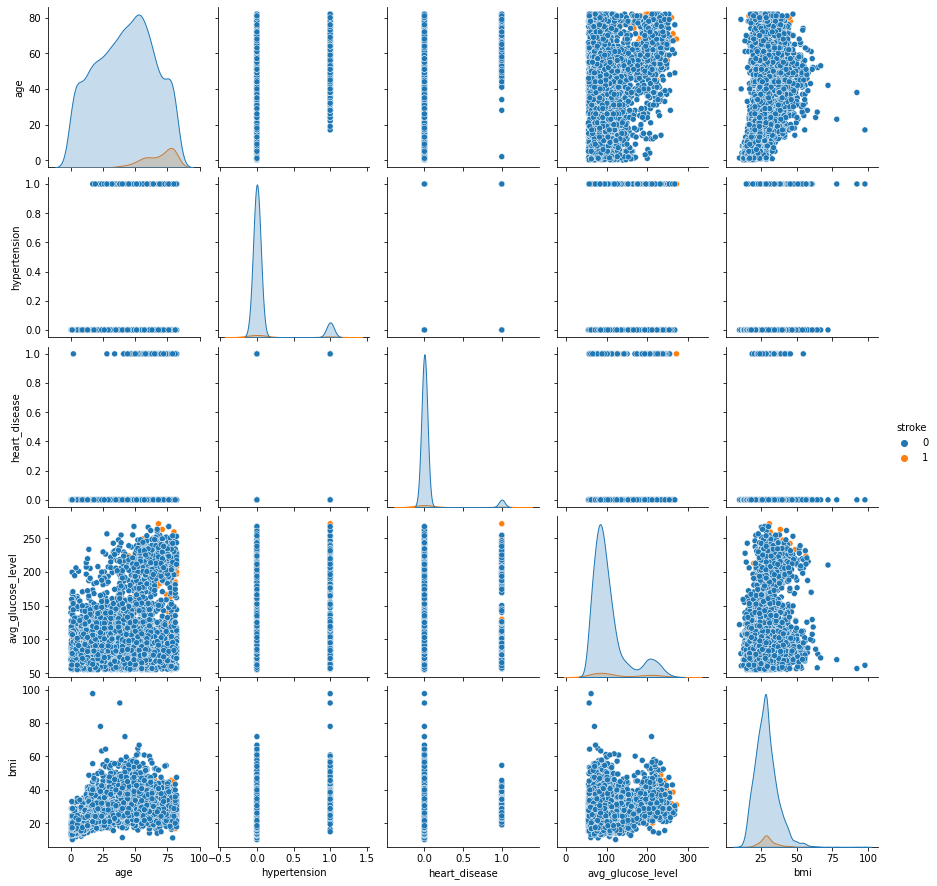

In [14]:
sns.pairplot(df,hue="stroke")
plt.show()

In [15]:
df.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [16]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

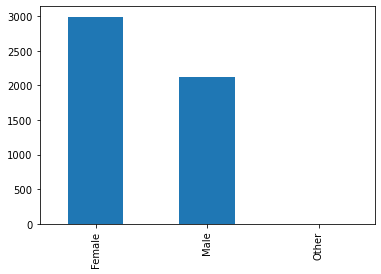

In [17]:
df["gender"].value_counts().plot(kind="bar")
plt.show()

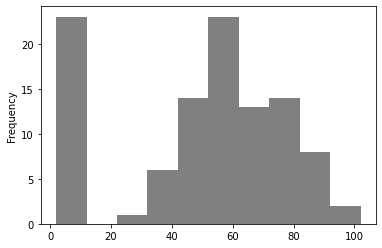

In [18]:
df["age"].value_counts().plot(kind="hist",color="gray")
plt.show()

In [19]:
df["hypertension"].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

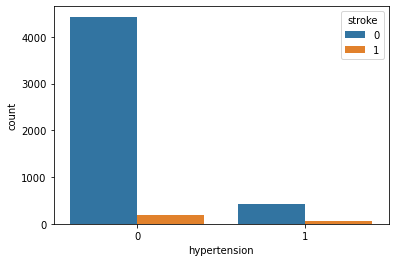

In [20]:
sns.countplot(data=df,x="hypertension",hue="stroke")
plt.show()

In [21]:
df["heart_disease"].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

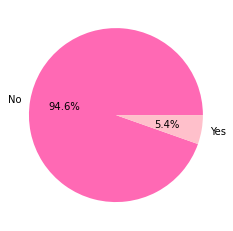

In [22]:
plt.pie(df["heart_disease"].value_counts(),labels=["No","Yes"],colors=["hotpink","pink"],autopct="%1.1f%%")
plt.show()

In [23]:
df["ever_married"].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

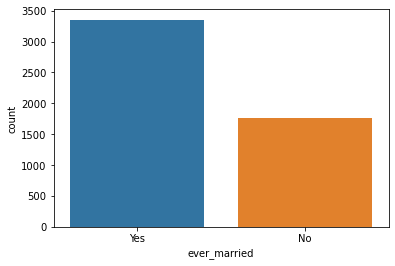

In [24]:
sns.countplot(data=df,x="ever_married")
plt.show()

In [25]:
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

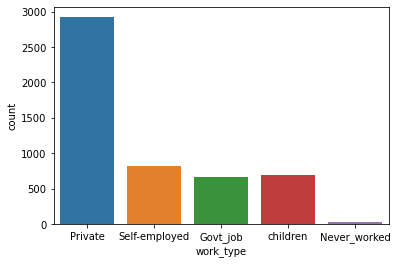

In [26]:
sns.countplot(data=df,x="work_type")
plt.show()

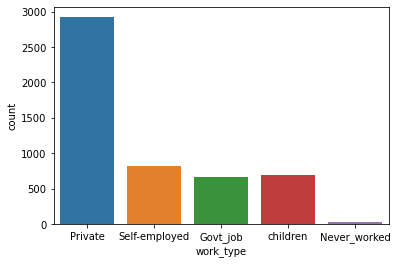

In [27]:
sns.countplot(data=df,x="work_type")
plt.show()

In [28]:
df["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

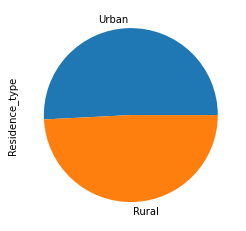

In [29]:
df["Residence_type"].value_counts().plot(kind="pie")
plt.show()

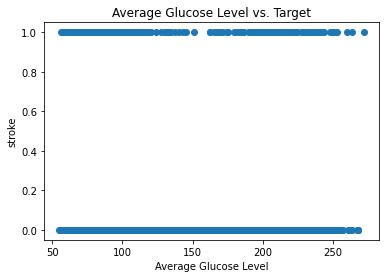

In [30]:
x = df['avg_glucose_level']
y = df['stroke']

# Create a scatter plot
plt.scatter(x, y)

# Set the title and axis labels
plt.title('Average Glucose Level vs. Target')
plt.xlabel('Average Glucose Level')
plt.ylabel('stroke')

# Display the plot
plt.show()

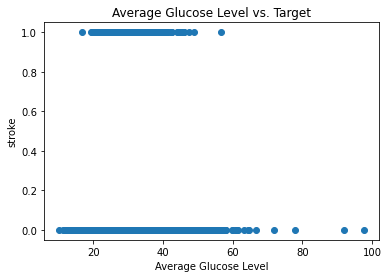

In [31]:
x = df['bmi']
y = df['stroke']

# Create a scatter plot
plt.scatter(x, y)

# Set the title and axis labels
plt.title('Average Glucose Level vs. Target')
plt.xlabel('Average Glucose Level')
plt.ylabel('stroke')

# Display the plot
plt.show()

<AxesSubplot:>

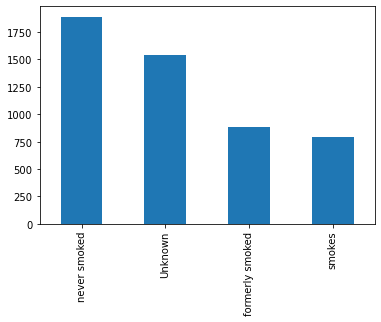

In [32]:
df["smoking_status"].value_counts().plot(kind="bar")

In [33]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [34]:
# In the above data minimum age is 0.08 years & maximum age is 82 years and average age is 43 years

### encoding

In [35]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

catcol=df.select_dtypes(object).columns
print(catcol)

df[catcol]=oe.fit_transform(df[catcol])

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [36]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.600000,1.0,1
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.893237,2.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.500000,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.400000,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.000000,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1.0,2.0,1.0,83.75,28.893237,2.0,0
5106,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.000000,2.0,0
5107,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.600000,2.0,0
5108,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.600000,1.0,0


### skewness removal

In [37]:
from scipy.stats import skew

colname=df.select_dtypes(["int","float"]).columns
print(colname)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


gender
0.35290826168415185


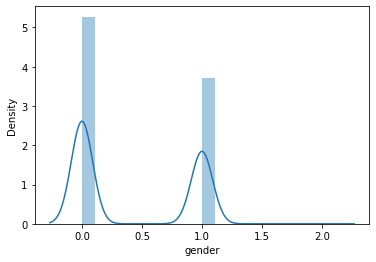

age
-0.1370190866396024


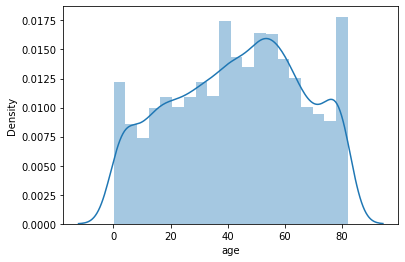

hypertension
2.714594511421973


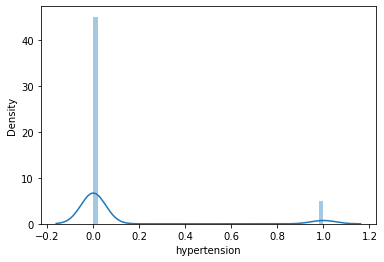

heart_disease
3.9460851899886302


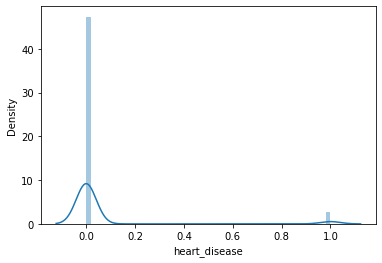

ever_married
-0.6575521915370907


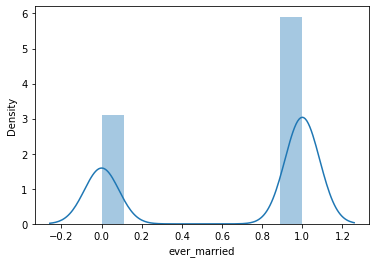

work_type
-0.30852688017717733


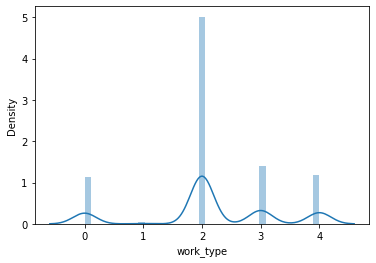

Residence_type
-0.03209806643844619


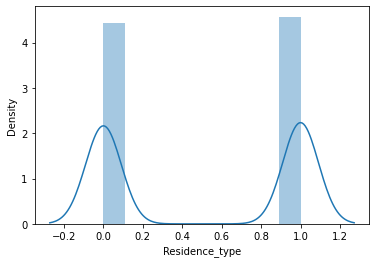

avg_glucose_level
1.571822297397199


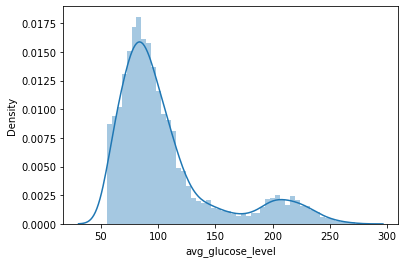

bmi
1.0763999841401004


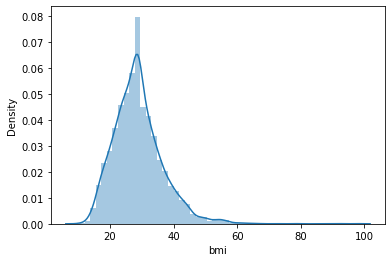

smoking_status
-0.03922291694728357


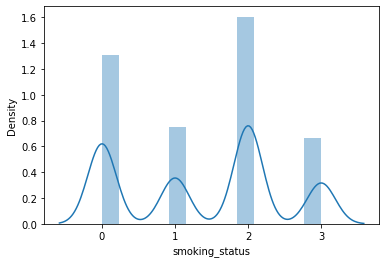

stroke
4.192053480263753


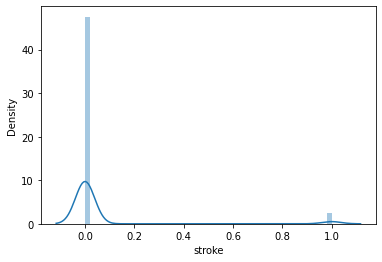

In [38]:
for col in df[colname]:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [39]:
df.corr().style.background_gradient()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.219148,1.000000,0.028123


In [40]:
# in the case of stroke dataset when i found out that co-relation is low and skewness is high 
# in the hypertension and avg_glocuse_level and bmi column but i think it is not necessary to remove skewness
# beacuse it show continuous value and on the top of the hand it gives us the information about people 
# and people may differ person to person in glocuse level and bmi and hypertension

### split data into x and y

In [41]:
x=df.iloc[:,:-1]
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.600000,1.0
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.893237,2.0
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.500000,2.0
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.400000,3.0
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.000000,2.0
...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1.0,2.0,1.0,83.75,28.893237,2.0
5106,0.0,81.0,0,0,1.0,3.0,1.0,125.20,40.000000,2.0
5107,0.0,35.0,0,0,1.0,3.0,0.0,82.99,30.600000,2.0
5108,1.0,51.0,0,0,1.0,2.0,0.0,166.29,25.600000,1.0


In [42]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

### apply train test split

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

### apply model

In [44]:
def mymodel(model):
    
    #model creation
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    #cheaking bias and variance
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f"Training Accuracy= {train}")
    print(f"Testing Accuracy= {test}")
    
    #model evaluation
    
    print(classification_report(ytest,ypred))
    return model

### import algorithm 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report


In [46]:
knn=mymodel(KNeighborsClassifier())

Training Accuracy= 0.9516354487000279
Testing Accuracy= 0.9471624266144814
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.12      0.01      0.02        75

    accuracy                           0.95      1533
   macro avg       0.54      0.50      0.50      1533
weighted avg       0.91      0.95      0.93      1533



In [47]:
logreg=mymodel(LogisticRegression())

Training Accuracy= 0.9513558848196813
Testing Accuracy= 0.9510763209393346
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.50      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.73      0.51      0.50      1533
weighted avg       0.93      0.95      0.93      1533



In [48]:
svm=mymodel(SVC())

Training Accuracy= 0.9513558848196813
Testing Accuracy= 0.9510763209393346
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



In [49]:
dt=mymodel(DecisionTreeClassifier())

Training Accuracy= 1.0
Testing Accuracy= 0.9080234833659491
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1458
           1       0.12      0.13      0.12        75

    accuracy                           0.91      1533
   macro avg       0.54      0.54      0.54      1533
weighted avg       0.91      0.91      0.91      1533



In [50]:
# After applying different classification model we get training and testing accuracy
# in case of KNN regression Training Accuracy= 0.9516354487000279 and Testing Accuracy= 0.9471624266144814
# in case of logistic regession Training Accuracy= 0.9513558848196813 and Testing Accuracy= 0.9510763209393346
# in case of support vector machine Training Accuracy= 0.9513558848196813 and Testing Accuracy= 0.9510763209393346
# in case if Decision Tree Training Accuracy= 1.0 and Testing Accuracy= 0.9145466405740378

In [51]:
# from the above observation it shown thatsupport vector machin and logistic regression have
# perfect training and testing accuracy so that i'll go for support vector machine

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [53]:
pipe=Pipeline(
    steps=[
        ("scaler",StandardScaler()),
        ("svm",SVC())
    ]
)

In [54]:
pipe.fit(xtrain,ytrain)
ypred=pipe.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



In [55]:
train = pipe.score(xtrain,ytrain)
test = pipe.score(xtest,ytest)

print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

Training Accuracy:- 0.9519150125803746
 Testing Accuracy:- 0.9510763209393346


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameter = {
             "C":[0.1,1,10],
             "gamma":[0.1,1,10],
             "kernel":["rbf"]
     
}

In [58]:
grid = GridSearchCV(SVC(), parameter, verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.6s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   3.0s
[CV] END ........................C=0.1, gamma=10,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['rbf']},
             verbose=2)

In [59]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [60]:
grid.best_score_

0.9516357385631128

In [61]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [62]:
svm = grid.best_estimator_
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



### cross validation

In [63]:
from sklearn.model_selection import cross_val_score

# Create an SVM classifier with default hyperparameters
svm = SVC()

# Perform 10-fold cross-validation on the SVM model
scores = cross_val_score(svm, x, y, cv=10)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Cross-validation accuracy: 0.95 (+/- 0.00)


### Ensemble learning

In [64]:
from sklearn.ensemble import BaggingClassifier

# Create a bagging classifier with 10 SVM base estimators
bagging = BaggingClassifier(base_estimator=svm, n_estimators=10)

# Train the bagging classifier on the training data
bagging.fit(xtrain, ytrain)

# Evaluate the bagging classifier on the testing data
score = bagging.score(xtest, ytest)
print(f"Bagging accuracy:  {score}")

Bagging accuracy:  0.9510763209393346


In [65]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [66]:
mymodel(AdaBoostClassifier())

Training Accuracy= 0.9513558848196813
Testing Accuracy= 0.9504240052185258
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.40      0.03      0.05        75

    accuracy                           0.95      1533
   macro avg       0.68      0.51      0.51      1533
weighted avg       0.93      0.95      0.93      1533



AdaBoostClassifier()

In [67]:
mymodel(GradientBoostingClassifier())

Training Accuracy= 0.961420184512161
Testing Accuracy= 0.9504240052185258
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.33      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.64      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533



GradientBoostingClassifier()

In [68]:
!pip install xgboost

In [69]:
from xgboost import XGBClassifier

In [70]:
mymodel(XGBClassifier())

Training Accuracy= 0.9980430528375733
Testing Accuracy= 0.9399869536855838
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1458
           1       0.23      0.09      0.13        75

    accuracy                           0.94      1533
   macro avg       0.59      0.54      0.55      1533
weighted avg       0.92      0.94      0.93      1533



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### hyper parameter tuning

In [71]:
# Train the final model on the entire dataset
final_model = SVC(C=1.0, kernel='rbf')
final_model.fit(x, y)

SVC()

### predict new observation

In [74]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.600000,1.0
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.893237,2.0
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.500000,2.0
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.400000,3.0
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.000000,2.0


In [75]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(xtrain,ytrain)
svm.predict(xtrain)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
def new_observation():
    gender=input("Enter gender(Male/Female/Other)=")
    age=float(input("Enter age="))
    hypertension=int(input("Do you have hypertension (Yes=1/No=0)="))
    heart_disease=int(input("Do you have heart disease (Yes=1/No=0)="))
    ever_married=input("Are you married (Yes/No)=")
    work_type=input("Enter work type(Private/Self_employed/children/Govt_job/Never_worked)=")
    residence_type=input("Enter residence type (Urban/Rural)=")
    avg_glucose_level=float(input("Enter average glucose level="))
    bmi=float(input("Enter BMI="))
    smoking_status=input("Enter smoking status (formerly smoked/never smoked/unknown/smokes)=")
    
    newob=[gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status]
    newob[0],newob[4],newob[5],newob[6],newob[-1]=oe.transform([[newob[0],newob[4],newob[5],newob[6],newob[-1]]])[0]
    
    y=svm.predict([newob])[0]
    
    if y==1:
        print("person have stroke")
    else:
        print("person don't have stroke")
    
    return y

In [79]:
new_observation()

Enter gender(Male/Female/Other)=Female
Enter age=34
Do you have hypertension (Yes=1/No=0)=0
Do you have heart disease (Yes=1/No=0)=1
Are you married (Yes/No)=Yes
Enter work type(Private/Self_employed/children/Govt_job/Never_worked)=children
Enter residence type (Urban/Rural)=Urban
Enter average glucose level=34
Enter BMI=23
Enter smoking status (formerly smoked/never smoked/unknown/smokes)=smokes
person don't have stroke


0